<a href="https://colab.research.google.com/github/Bookas1468/data-science-google-colab/blob/main/projects/Copy_of_Unit5Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U5proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU5proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU5proj.ipynb"

# Unit 5 Project: Making a Generalized Linear Model (1 predictor)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generalized linear model structure built with pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated heirearchical glm. **Find a data set that interests you, and apply the simplest model that captures the patterns in the data.**

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit5NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
import graphviz as gv

from scipy.interpolate import PchipInterpolator

here is my data. it is from kaagle and it is a csv file containing one thousand people with information about their parent education level, lunch price, and testing score. I chose this dataset because I thought that it was relevant to me personally as a student and that writing and reading scores should have an obvious relationship.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

data = pd.read_csv(path+"/StudentsPerformance.csv")
data


Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Path to dataset files: /kaggle/input/students-performance-in-exams


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


as you can see from the scatter plot of the data it does appear that reading and writing score are atleast somehow related but we will need to do data science to get a better idea of that

<Axes: xlabel='reading score', ylabel='writing score'>

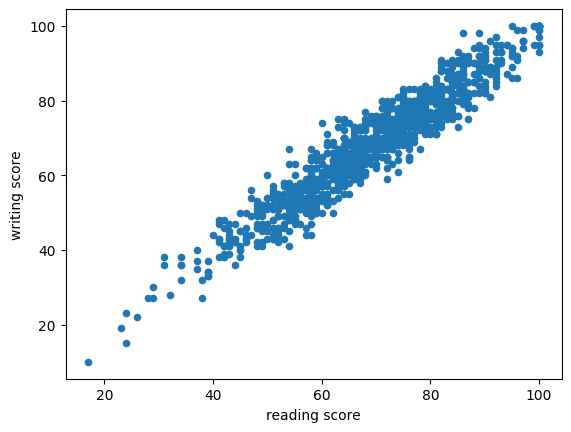

In [3]:
data.plot.scatter("reading score","writing score")

My cauasal diagram is assuming that the ability to score well on a standardized reading test will result in the ability to score better on a writing standardized test as you need to be able to read a text effectively to edit it (which is the primary way standardized tests measure the ability to write)

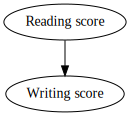

In [4]:
cauasal = gv.Digraph(comment='bikes_dag') #b for bikes

cauasal.node('R', 'Reading score')
cauasal.node('W','Writing score')

cauasal.edges(['RW', ])

cauasal

here is model. it just uses the default normals and halfcauchy with no math for the deterministic since the data is more or less linear.

In [ ]:
#lt for linear test (scores)
with pm.Model() as model_lt:

    #priors
    α = pm.Normal("α", mu=0, sigma=100)
    β = pm.Normal("β", mu=0, sigma=10)

    #this is the linear part of our model
    μ = pm.Deterministic("μ", α + β * data['reading score'])

    #prior for the standard deviation of our likelihood
    #Cauchy is a T dist with nu = 1
    σ = pm.HalfCauchy("σ", 10)

    #likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=data['writing score'])

    #inference data object
    idata_lt = pm.sample()

array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'β'}>,
       <Axes: title={'center': 'σ'}>], dtype=object)

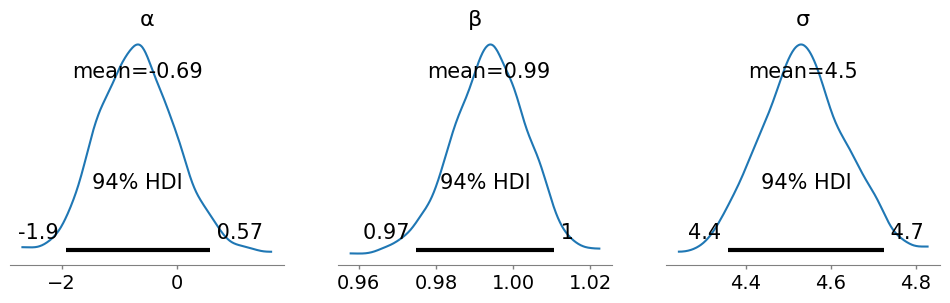

In [6]:
#plot of the posteriors for all the components of my line
#'~μ' means plot all variables except μ
az.plot_posterior(idata_lt, var_names=["~μ"], figsize=(12, 3))

In [ ]:
# posterior predictive check
pm.sample_posterior_predictive(idata_lt, model=model_lt,  extend_inferencedata=True)

posterior predictive, I only changed the names of things here since honestly i have no idea what half of this does.

model looks pretty good though it gets most of the points and matches the trend.

Text(0, 0.5, 'writing score')

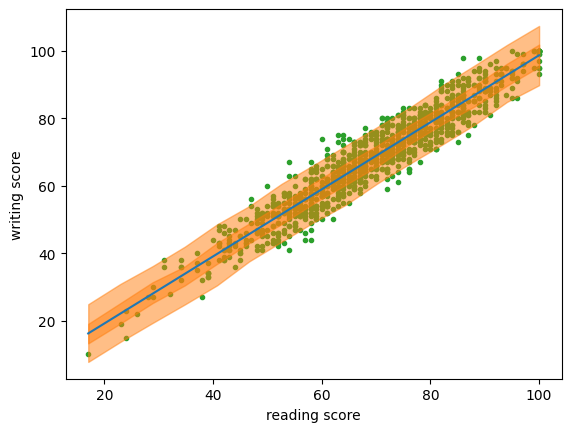

In [9]:
#plots the posterior predictive distribution

#grabs the expected line, or line of best fit formula
mean_line = idata_lt.posterior["μ"].mean(("chain", "draw"))

#creates some x values to run through our line formula
readings = np.random.normal(data['reading score'].values, 0.01)
idx = np.argsort(readings)
x = np.linspace(readings.min(), readings.max(), 15)

#grabs the 94% HDI and 50% HDI
y_pred_q = idata_lt.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
#sets up the HDIs for graphing
y_hat_bounds = iter(
    [
        PchipInterpolator(readings[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)

#plots raw data and our line of best fit
_, ax = plt.subplots()
ax.plot(data['reading score'], data['writing score'], "C2.", zorder=-3)
ax.plot(data['reading score'][idx], mean_line[idx], c="C0")


#graphs the 94% and 50% HDIs
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)

#labels
ax.set_xlabel("reading score")
ax.set_ylabel("writing score")

here's the posterior predictive check plotted. Overall it's a pretty good match, due to the relatively small sample size the spikes and dips in the observed data aren't exactly in line with the model but if the sample size was larger it might match better. It's interesting how the observed data spikes up near the right, I think it's because the maximum score is 100 so anyone on the super high scoring extreme that could have scored "higher" if the test was measured differently are clumped together. This doesn't happen as much on the left side because very few if any students are going to be get exactly 0 since it's very easy to get one question right even if guessing completely at random for each of them.

<Axes: xlabel='y_pred'>

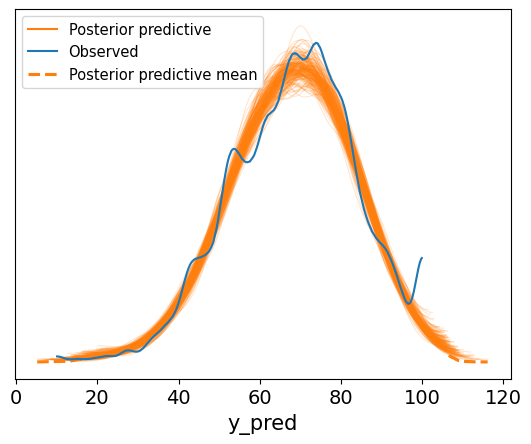

In [10]:
az.plot_ppc(idata_lt, num_pp_samples=200, colors=["C1", "C0", "C1"])

conclusion:
my model matched my data pretty well (because the data was boring). From what I can tell my model supports my hypothesis that reading scores influence writing scores, but due to the many, many things that muddy the waters between the two it's hard to tell how directly they relate.